# OPTION GREEKS & MACHINE LEARNING ON PYTHON 

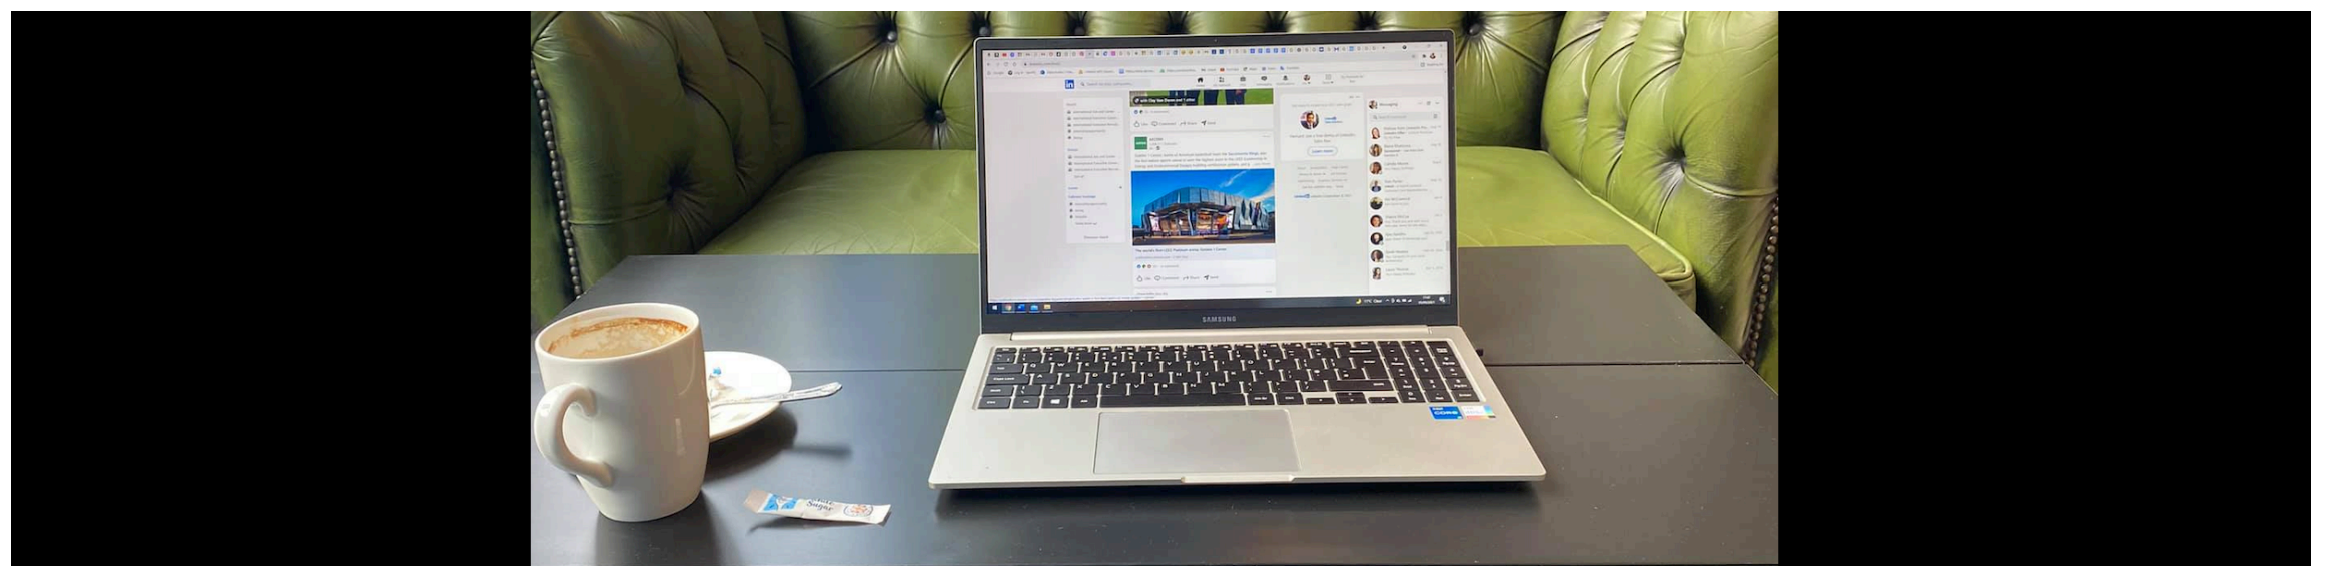

#### Hemant Thapa

## 1. LIBRARIES

In [92]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import math 
import statistics as st
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

## 2. SPX JUNE OPTION DATASET 

In [2]:
df = pd.read_csv('spx_june.csv')

In [3]:
df[:10]

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
0,$SPX,4273.79,Put,4295,6/5/2023,0,18.60,21.70,24.80,20.34,14766,124,119.08,13.05%,-0.763855,15:59 ET
1,$SPX,4273.79,Put,4280,6/5/2023,0,4.50,5.45,6.40,6.00,65599,721,90.98,2.72%,-0.867747,15:59 ET
2,$SPX,4273.79,Put,4275,6/5/2023,0,0.40,0.70,1.00,0.91,81797,1115,73.36,0.00%,0.000000,15:59 ET
3,$SPX,4273.79,Put,4260,6/6/2023,1,4.20,4.35,4.50,4.70,7400,186,39.78,11.12%,-0.281363,16:14 ET
4,$SPX,4273.79,Put,4285,6/5/2023,0,9.30,10.50,11.70,11.00,41959,1079,38.89,4.81%,-0.858122,15:59 ET
5,$SPX,4273.79,Put,4290,6/5/2023,0,13.00,15.50,18.00,16.00,33648,976,34.48,8.64%,-0.798202,15:59 ET
6,$SPX,4273.79,Put,4290,6/6/2023,1,17.90,18.20,18.50,19.02,3662,112,32.70,8.90%,-0.789087,16:13 ET
7,$SPX,4273.79,Put,4300,6/5/2023,0,23.60,25.80,28.00,26.10,14268,466,30.62,11.71%,-0.841882,15:59 ET
8,$SPX,4273.79,Put,4270,6/6/2023,1,7.40,7.55,7.70,7.84,6359,209,30.43,10.71%,-0.428070,16:14 ET
9,$SPX,4273.79,Call,4345,6/6/2023,1,0.05,0.10,0.15,0.10,8374,293,28.58,13.40%,0.009868,16:13 ET


In [4]:
df.shape

(230, 16)

In [5]:
#Checking Unique Expiration Date
df['Exp Date'].unique()

array(['6/5/2023', '6/6/2023', '6/14/2023', '6/7/2023', '6/26/2023',
       '6/12/2023', '10/18/2023', '7/31/2023', '9/20/2023', '6/8/2023',
       '9/15/2023', '6/30/2023', '6/15/2023', '10/31/2023', '7/14/2023',
       '8/18/2023', '7/7/2023', '6/23/2023', '6/16/2023', '6/9/2023',
       '7/21/2023', '7/3/2023', '10/20/2023', '8/16/2023', '6/21/2023',
       '11/17/2023', '6/13/2023'], dtype=object)

In [6]:
#Seprating data for future option contact on 14th June 2023
df_june = df[df['Exp Date']=='6/14/2023']

In [7]:
#printing seprated data
df_june

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
11,$SPX,4273.79,Put,3700,6/14/2023,9,0.25,0.35,0.45,0.36,7530,345,21.83,35.99%,-0.004663,15:53 ET
61,$SPX,4273.79,Put,3200,6/14/2023,9,0.00,0.10,0.20,0.10,1213,217,5.59,60.04%,-0.000881,12:28 ET
100,$SPX,4273.79,Call,4400,6/14/2023,9,2.50,2.65,2.80,2.66,1030,267,3.86,12.15%,0.073582,16:14 ET
155,$SPX,4273.79,Put,4250,6/14/2023,9,20.90,21.20,21.50,22.03,835,362,2.31,12.56%,-0.365680,15:58 ET
203,$SPX,4273.79,Put,4300,6/14/2023,9,43.10,43.50,43.90,44.11,543,353,1.54,11.68%,-0.613357,16:13 ET


In [8]:
#Total 5 option contract on 14.06.2023
df_june.shape

(5, 16)

## 3. SEPRATING RANDOM CALL OPTION DATA FOR CALCULATING GREEKS

In [9]:
#Selecting Random call data for option greeks
df_june_call = df_june[2:3]
df_june_call

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
100,$SPX,4273.79,Call,4400,6/14/2023,9,2.5,2.65,2.8,2.66,1030,267,3.86,12.15%,0.073582,16:14 ET


## 4. DATA MINING FROM YFINANCE API

In [10]:
ticker = "^SPX"

In [11]:
data = yf.download(ticker, period='1y')

[*********************100%***********************]  1 of 1 completed


In [12]:
data = data[:251]

In [13]:
data.shape

(251, 6)

In [14]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,4226.709961,4231.100098,4192.180176,4205.520020,4205.520020,4228510000
2023-05-31,4190.740234,4195.439941,4166.149902,4179.830078,4179.830078,5980670000
2023-06-01,4183.029785,4232.430176,4171.640137,4221.020020,4221.020020,4391860000
2023-06-02,4241.009766,4290.669922,4241.009766,4282.370117,4282.370117,4454200000
2023-06-05,4282.990234,4299.279785,4266.819824,4273.790039,4273.790039,3813290000


## 5. CURRENT MARKET PRICE

In [15]:
current_market_price = data.Close[-1]

In [16]:
print(f'At the money: {round(current_market_price,2)} GBP')

At the money: 4273.79 GBP


In [17]:
data['SMA_10'] = data['Close'].rolling(10).mean()

In [18]:
data['SMA_20'] = data['Close'].rolling(20).mean()

## 6. QUANTITATIVE

In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_20
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000
mean,3971.417092,4000.974899,3941.760356,3972.960013,3972.960013,4.311137e+09,3967.706408,3966.859953
std,159.398310,153.924246,165.208524,161.251897,161.251897,8.529617e+08,146.405596,133.296568
min,3520.370117,3608.340088,3491.580078,3577.030029,3577.030029,1.706460e+09,3642.976978,3668.380994
25%,3853.079956,3890.364990,3817.904907,3855.094971,3855.094971,3.864365e+09,3850.263263,3873.320135
50%,3977.570068,4008.969971,3944.820068,3979.870117,3979.870117,4.143800e+09,3979.351526,3973.285022
75%,4109.125000,4136.919922,4087.664917,4113.160156,4113.160156,4.537750e+09,4105.073230,4082.200250
max,4290.459961,4325.279785,4277.770020,4305.200195,4305.200195,9.354280e+09,4235.298096,4187.390552


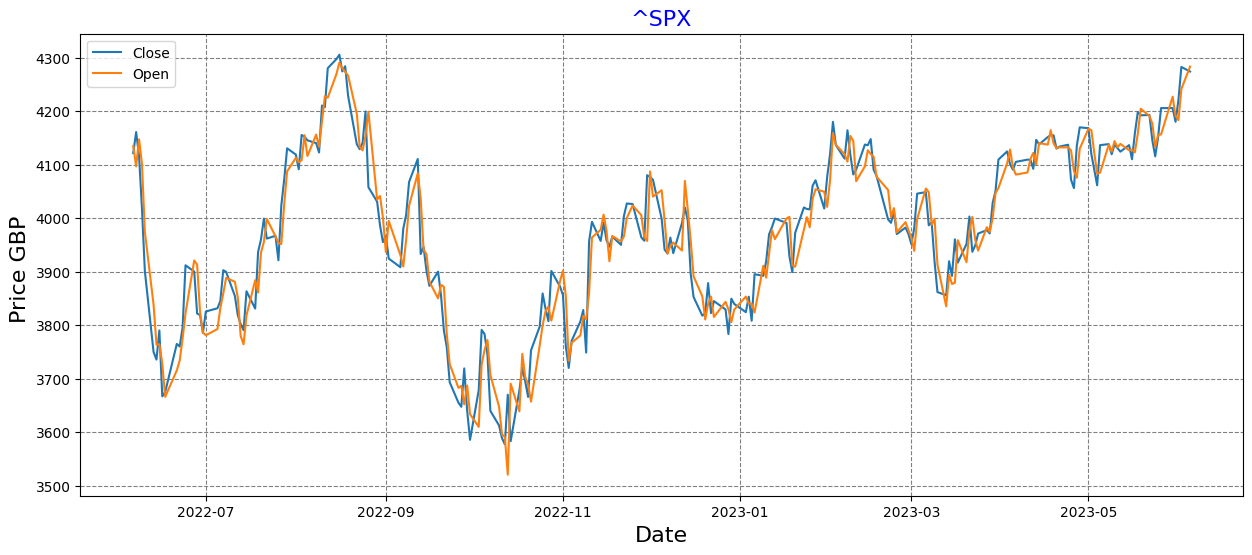

In [20]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data.Close, label='Close')
plt.plot(data.index, data.Open,label='Open')
plt.grid(linestyle="--", color='grey')
plt.title(f'{ticker}', fontsize=16, color='Blue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price GBP ', fontsize=16)
plt.legend()
plt.show()

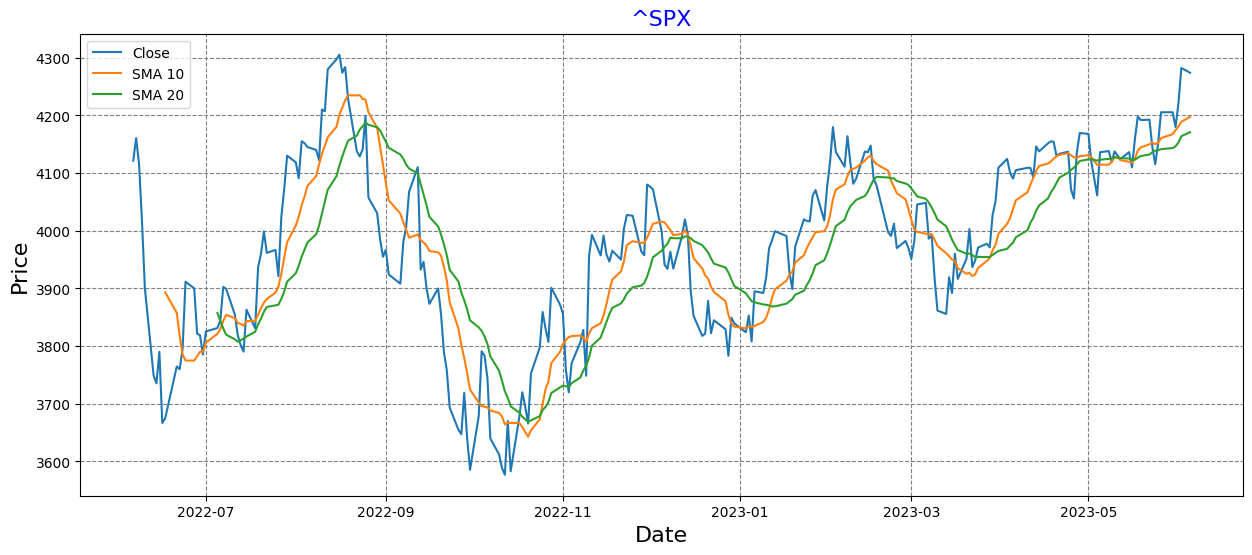

In [21]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data.Close, label="Close")
plt.plot(data.index, data['SMA_10'], label="SMA 10")
plt.plot(data.index, data['SMA_20'], label="SMA 20")
plt.grid(linestyle="--", color='grey')
plt.title(f'{ticker}', fontsize=16, color='Blue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.show()

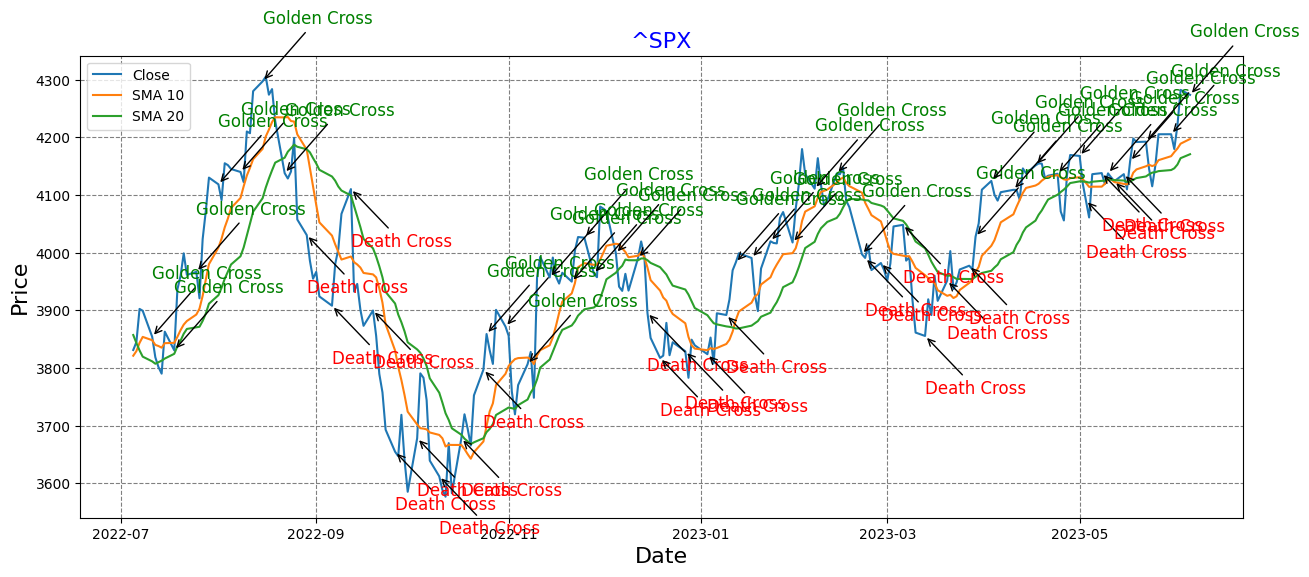

In [91]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data.Close, label="Close")
plt.plot(data.index, data['SMA_10'], label="SMA 10")
plt.plot(data.index, data['SMA_20'], label="SMA 20")
plt.grid(linestyle="--", color='grey')
plt.title(f'{ticker}', fontsize=16, color='blue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
cross_indices = data[data['SMA_10'] > data['SMA_20']].index

# Plot the golden cross
for i in range(1, len(cross_indices)):
    if cross_indices[i] - cross_indices[i-1] > pd.Timedelta(days=1):
        plt.annotate('Golden Cross', xy=(cross_indices[i], data.loc[cross_indices[i], 'Close']),
                     xytext=(cross_indices[i], data.loc[cross_indices[i], 'Close']+100),
                     arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, color='green')


cross_indices = data[data['SMA_10'] < data['SMA_20']].index
# Plot the death cross
for i in range(1, len(cross_indices)):
    if cross_indices[i] - cross_indices[i-1] > pd.Timedelta(days=1):
        plt.annotate('Death Cross', xy=(cross_indices[i], data.loc[cross_indices[i], 'Close']),
                     xytext=(cross_indices[i], data.loc[cross_indices[i], 'Close']-100),
                     arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')
plt.show()

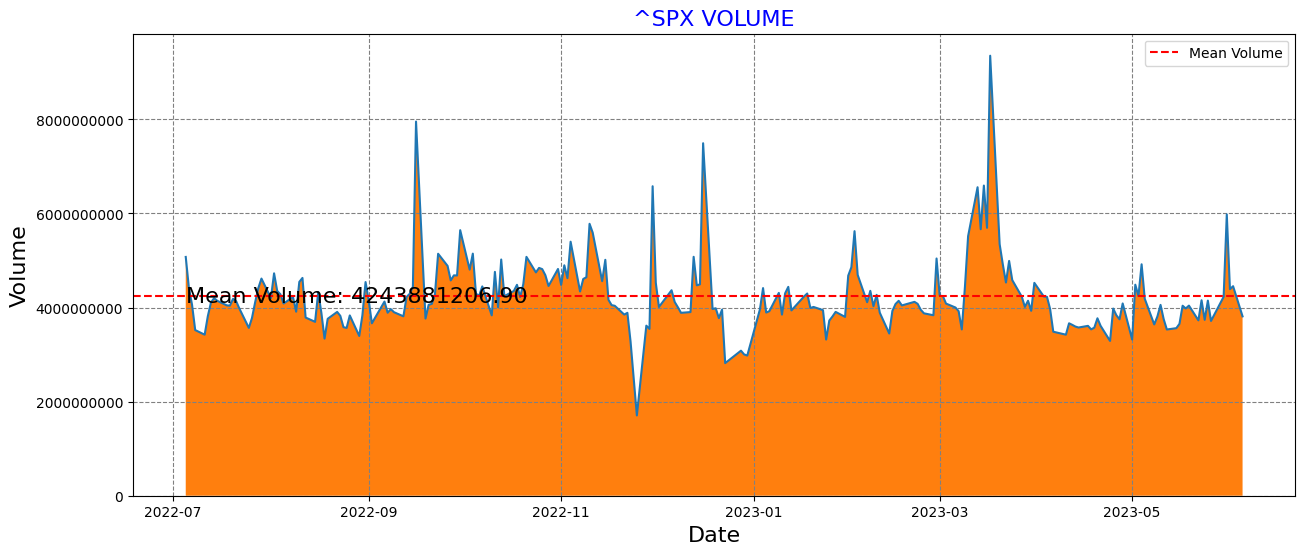

In [93]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data.Volume)
plt.stackplot(data.index, data.Volume)
plt.grid(linestyle="--", color='grey')
mean_volume = data['Volume'].mean()
plt.axhline(y=mean_volume, color='red', linestyle='--', label='Mean Volume')
plt.text(data.index[0], mean_volume, f"Mean Volume: {mean_volume:.2f}",
         color='black', fontsize=16, va='center')
plt.title(f'{ticker} VOLUME', fontsize=16, color='blue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## 7. ANALYSING DERIVATIVES

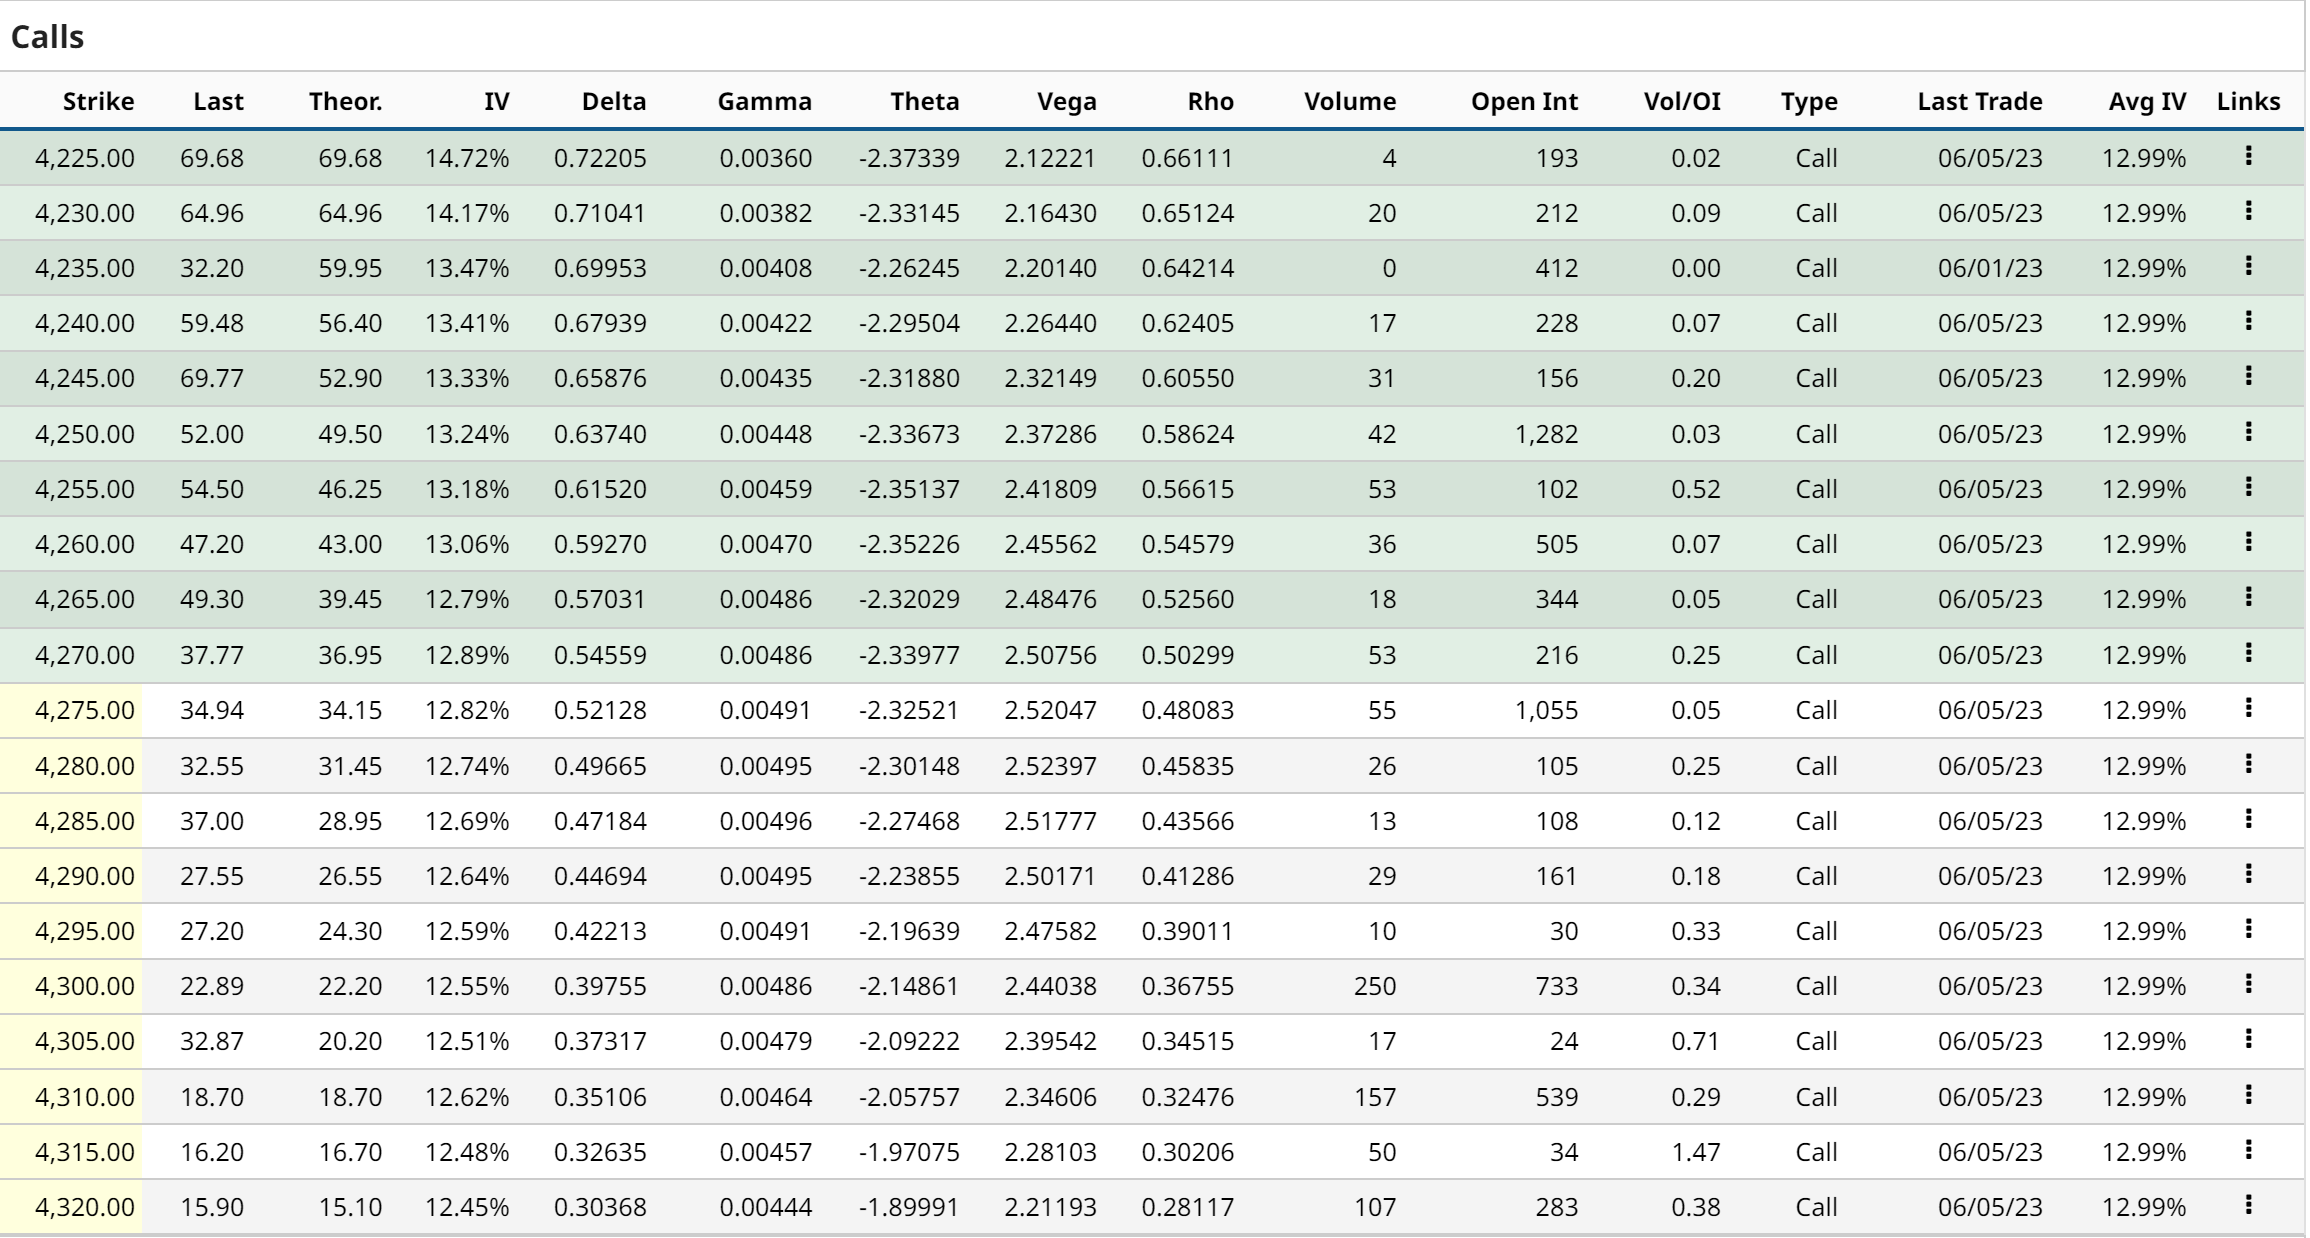

In [94]:
def calculate_option_price(S, K, r, T, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return option_price

def calculate_implied_volatility(S, K, r, T, option_price, option_type, 
                                 initial_volatility=0.5, max_iterations=100, tolerance=1e-6):
    sigma = initial_volatility
    for i in range(max_iterations):
        price_diff = option_price - calculate_option_price(S, K, r, T, sigma, option_type)
        vega = calculate_vega(S, K, r, T, sigma)
        if abs(price_diff) < tolerance:
            break
        if abs(vega) < tolerance:
            return f'Minimum value {None}'  
        sigma = sigma + price_diff / vega
    return sigma

def calculate_vega(S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    vega = S * norm.pdf(d1) * math.sqrt(T)
    return vega

In [95]:
df_june_call

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
100,$SPX,4273.79,Call,4400,6/14/2023,9,2.5,2.65,2.8,2.66,1030,267,3.86,12.15%,0.073582,16:14 ET


In [96]:
current_market_price

4273.7900390625

 Implied volatility is a measure of the market's expectation of future volatility. It is derived from the prices of options on the underlying financial instrument. Options pricing models, such as the Black-Scholes model, use implied volatility as an input to calculate the theoretical value of options. Implied volatility reflects the consensus among market participants about the future volatility of the underlying instrument.

In [98]:
S = 4273.79  # Underlying asset price
K = 4400  # Strike price
r = 0.05  # Risk-free interest rate
T = 10/365  # Time to maturity (in years)
option_price = 2.65  # Market price of the option
option_type = 'call'  # 'call' or 'put'
implied_volatility = calculate_implied_volatility(S, K, r, T, option_price, option_type)
print(f"Implied Volatility: {round(implied_volatility,4)*100}%")

Implied Volatility: 11.49%


 Historical volatility is a measure of the price or return variability of a financial instrument based on historical data. It looks at the past price movements to estimate the level of risk or volatility associated with the instrument. Historical volatility is calculated using statistical techniques, such as standard deviation, on historical price or return data.

In [99]:
trading_days = 21*12
trading_days

252

In [30]:
#Percentage change in the 'Close' price from one day to the next and assigns it to a new column called 'Returns' 
data['Returns'] = data['Close'].pct_change()
data.dropna(inplace=True)
returns = data['Returns'].values
volatility = math.sqrt(252) * returns.std()  #252 trading days in a year
print(f"Historical Volatility: {volatility}")

Historical Volatility: 0.19901140666225575


## 8. ANALYSING BOND YIELDS

#### VALUATION OF OPTIONS OR DERIVATIVES BASED ON THE S&P 500 INDEX

The U.S. 10-Year Bond is a debt obligation note by The United States Treasury, that has the eventual maturity of 10 years. The yield on a Treasury bill represents the return an investor will receive by holding the bond to maturity, and should be monitored closely as an indicator of the government debt situation.

In [31]:
df_bond = pd.read_csv(r'BOND_BX_XTUP_TMUBMUSD10Y.csv')

In [32]:
df_bond.shape

(256, 5)

In [33]:
df_bond

,Date,Open,High,Low,Close
0,05/05/2023,3.385%,3.466%,3.372%,3.440%
1,05/04/2023,3.343%,3.544%,3.292%,3.385%
2,05/03/2023,3.429%,3.544%,3.341%,3.343%
3,05/02/2023,3.572%,3.572%,3.422%,3.429%
4,05/01/2023,3.422%,3.595%,3.422%,3.572%
...,...,...,...,...,...
251,05/12/2022,2.931%,2.931%,2.816%,2.852%
252,05/11/2022,2.994%,3.082%,2.907%,3.001%
253,05/10/2022,3.040%,3.066%,2.945%,3.082%
254,05/09/2022,3.140%,3.208%,3.028%,3.128%


#### REVERSING ROWS ACCORDING TO DATE

In [34]:
df_bond = df_bond.iloc[::-1]
df_bond[:5]

,Date,Open,High,Low,Close
255,05/06/2022,3.043%,3.149%,3.042%,3.130%
254,05/09/2022,3.140%,3.208%,3.028%,3.128%
253,05/10/2022,3.040%,3.066%,2.945%,3.082%
252,05/11/2022,2.994%,3.082%,2.907%,3.001%
251,05/12/2022,2.931%,2.931%,2.816%,2.852%


In [35]:
df.columns = df.columns.str.strip()

In [36]:
df_bond.Open = df_bond.Open.str.replace('%','')
df_bond.Close = df_bond.Close.str.replace('%','')
df_bond.High = df_bond.High.str.replace('%','')
df_bond.Low = df_bond.Low.str.replace('%','')

In [37]:
df_bond[:2]

,Date,Open,High,Low,Close
255,05/06/2022,3.043,3.149,3.042,3.130
254,05/09/2022,3.140,3.208,3.028,3.128


In [38]:
df_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 255 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    256 non-null    object
 1   Open    256 non-null    object
 2   High    256 non-null    object
 3   Low     256 non-null    object
 4   Close   256 non-null    object
dtypes: object(5)
memory usage: 10.1+ KB


In [39]:
df_bond['Open'] = df_bond['Open'].astype(float)
df_bond['High'] = df_bond['High'].astype(float)
df_bond['Low'] = df_bond['Low'].astype(float)
df_bond['Close'] = df_bond['Close'].astype(float)

In [40]:
df_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 255 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    256 non-null    object 
 1   Open    256 non-null    float64
 2   High    256 non-null    float64
 3   Low     256 non-null    float64
 4   Close   256 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.1+ KB


In [41]:
df_bond.set_index('Date', inplace=True)

In [42]:
df_bond[:2]

,Open,High,Low,Close
Date,,,,
05/06/2022,3.043,3.149,3.042,3.130
05/09/2022,3.140,3.208,3.028,3.128


In [43]:
df_bond[254:]

,Open,High,Low,Close
Date,,,,
05/04/2023,3.343,3.544,3.292,3.385
05/05/2023,3.385,3.466,3.372,3.440


In [44]:
mean_value = df_bond.Close.mean()
mean_value

3.43423046875

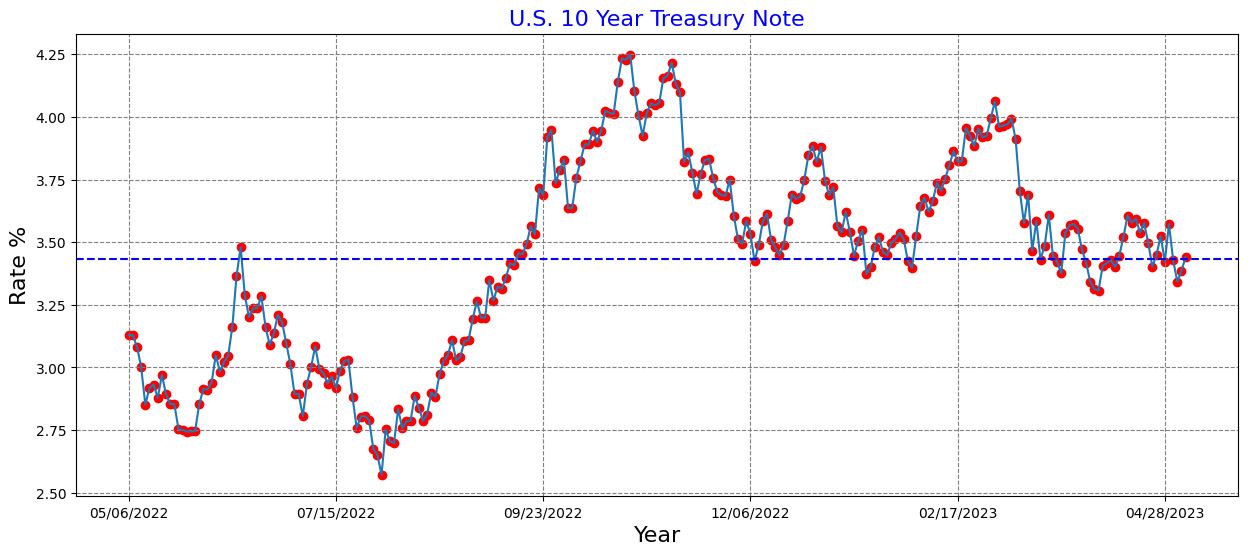

In [45]:
plt.figure(figsize=(15, 6))
df_bond.Close.plot()
plt.scatter(df_bond.index, df_bond.Close, color='red')
plt.grid(linestyle="--", color='grey')
plt.title(f'U.S. 10 Year Treasury Note', fontsize=16, color='blue')
plt.axhline(mean_value, color='blue', linestyle='--', label='Mean')
plt.ylabel('Rate %', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

Current Rate: 3.44


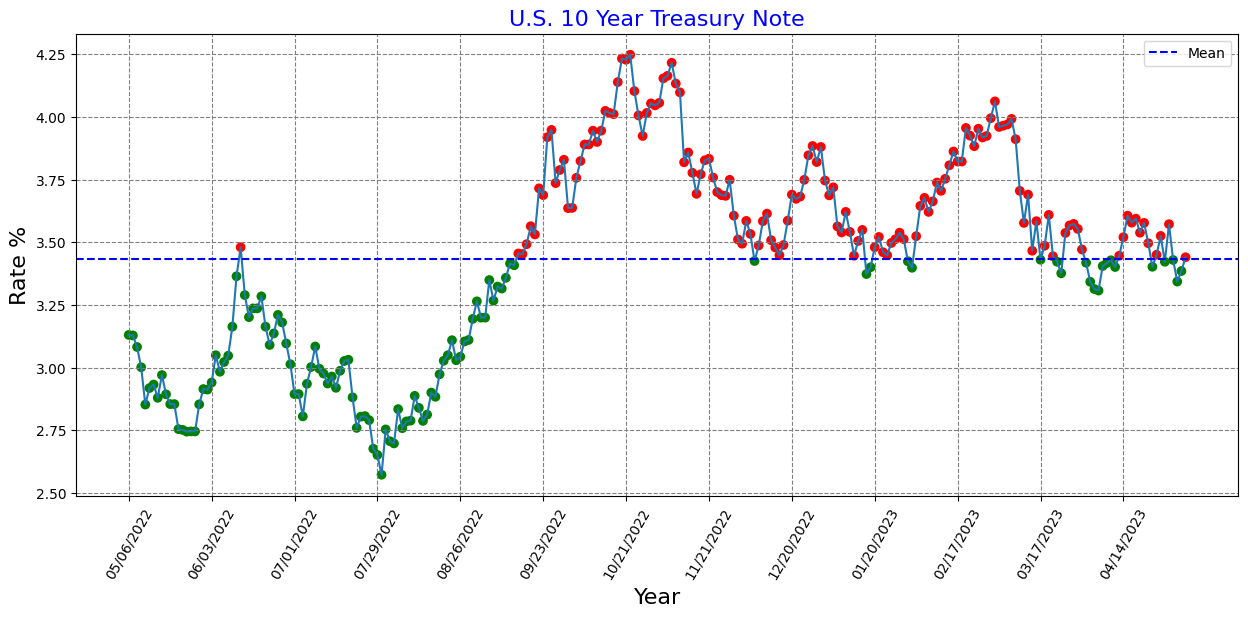

In [46]:
print(f'Current Rate: {df_bond.Close[-1]}')
plt.figure(figsize=(15, 6))
plt.scatter(df_bond.index, df_bond.Close, color=['red' if close > mean_value else 'green' for close in df_bond.Close])
plt.plot(df_bond.index, df_bond.Close) 
plt.axhline(mean_value, color='blue', linestyle='--', label='Mean')
plt.grid(linestyle='--', color='grey')
plt.title('U.S. 10 Year Treasury Note', fontsize=16, color='blue')
plt.ylabel('Rate %', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend()
plt.xticks(df_bond.index[::20], rotation=60) 
plt.show()

## LINEAR REGRESSION MODEL

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
df_bond.index = pd.to_datetime(df_bond.index, format='%m/%d/%Y')
df_bond['Date'] = df_bond.index.to_series().apply(lambda x: x.toordinal())

In [49]:
df_bond[:5]

,Open,High,Low,Close,Date
Date,,,,,
2022-05-06,3.043,3.149,3.042,3.130,738281
2022-05-09,3.140,3.208,3.028,3.128,738284
2022-05-10,3.040,3.066,2.945,3.082,738285
2022-05-11,2.994,3.082,2.907,3.001,738286
2022-05-12,2.931,2.931,2.816,2.852,738287


In [50]:
X = df_bond['Date'].values.reshape(-1, 1)
y = df_bond['Close'].values

In [51]:
X[:5]

array([[738281],
       [738284],
       [738285],
       [738286],
       [738287]], dtype=int64)

In [52]:
y[:5]

array([3.13 , 3.128, 3.082, 3.001, 2.852])

In [53]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [54]:
new_date = pd.to_datetime('06/06/2023', format='%m/%d/%Y')
new_date_ordinal = new_date.toordinal()
predicted_close = model.predict([[new_date_ordinal]])

In [55]:
print(f'Predicted closing value for {new_date.date()}: {predicted_close[0]:.3f}')

Predicted closing value for 2023-06-06: 3.910


In [56]:
treasury_yield = 3.910/100
print(f'The U.S. 10 Year Treasury Note Yield: {treasury_yield}')

The U.S. 10 Year Treasury Note Yield: 0.0391


In [57]:
pred_y = model.predict(X)
pred_y[:5]

array([3.02974687, 3.03641461, 3.03863719, 3.04085977, 3.04308235])

In [58]:
score = model.score(X, y)
print(f'R-squared score: {score:.2f}')

R-squared score: 0.35


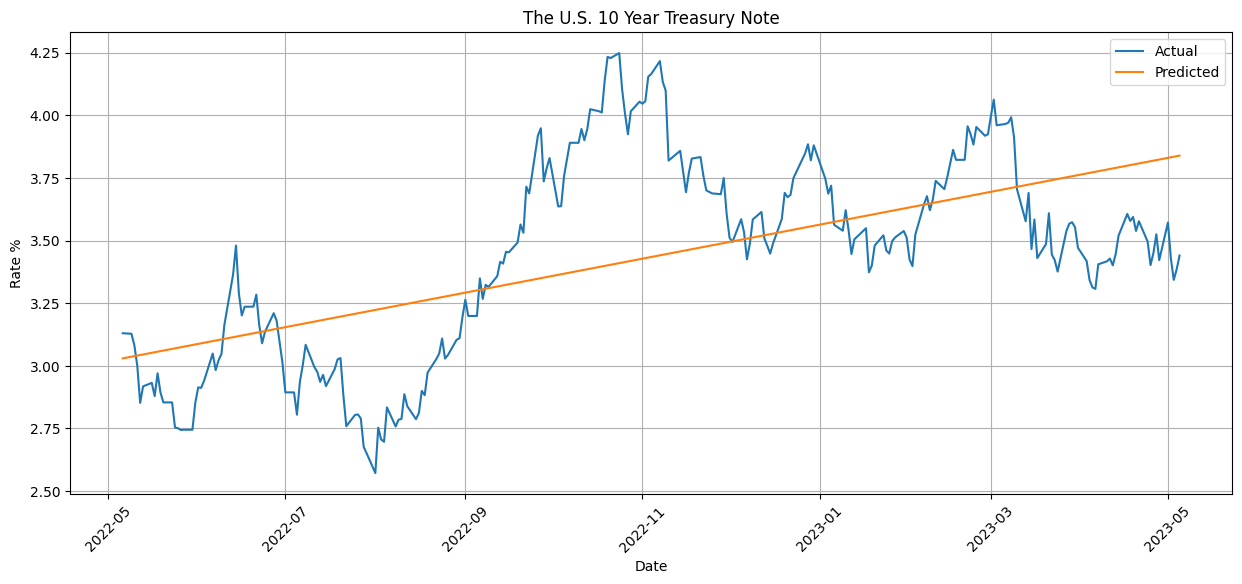

In [59]:
plt.figure(figsize=(15, 6))
plt.plot(df_bond.index, y, label='Actual')
plt.plot(df_bond.index, pred_y , label='Predicted')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('The U.S. 10 Year Treasury Note')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## TEST TRAIN & SPLIT

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train[:5]

array([[738484],
       [738399],
       [738358],
       [738596],
       [738427]], dtype=int64)

In [63]:
X_test[:5]

array([[738608],
       [738291],
       [738392],
       [738578],
       [738446]], dtype=int64)

In [64]:
y_train[:5]

array([3.688, 3.264, 2.759, 3.43 , 3.788])

In [65]:
y_test[:5]

array([3.573, 2.932, 3.029, 3.918, 4.011])

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
X_test[:5]

array([[738608],
       [738291],
       [738392],
       [738578],
       [738446]], dtype=int64)

In [69]:
from datetime import datetime

In [70]:
new_dates = [datetime.fromordinal(date) for date in X_test.flatten()]
for date in new_dates:
    print(date)

2023-03-29 00:00:00
2022-05-16 00:00:00
2022-08-25 00:00:00
2023-02-27 00:00:00
2022-10-18 00:00:00
2023-01-27 00:00:00
2023-04-18 00:00:00
2022-12-30 00:00:00
2022-05-19 00:00:00
2022-06-17 00:00:00
2023-01-20 00:00:00
2023-03-21 00:00:00
2023-03-31 00:00:00
2023-03-14 00:00:00
2022-11-15 00:00:00
2022-08-10 00:00:00
2023-02-16 00:00:00
2022-05-27 00:00:00
2022-09-19 00:00:00
2022-06-09 00:00:00
2023-04-07 00:00:00
2022-06-02 00:00:00
2022-10-21 00:00:00
2022-12-08 00:00:00
2022-06-22 00:00:00
2022-10-27 00:00:00
2023-05-03 00:00:00
2023-03-01 00:00:00
2022-05-20 00:00:00
2022-12-27 00:00:00
2023-01-26 00:00:00
2022-09-20 00:00:00
2022-12-02 00:00:00
2023-02-03 00:00:00
2023-03-22 00:00:00
2022-06-10 00:00:00
2022-09-05 00:00:00
2022-06-01 00:00:00
2022-08-19 00:00:00
2022-11-16 00:00:00
2023-02-13 00:00:00
2023-01-13 00:00:00
2023-04-13 00:00:00
2023-01-23 00:00:00
2022-07-08 00:00:00
2022-08-08 00:00:00
2022-05-30 00:00:00
2022-08-09 00:00:00
2023-03-10 00:00:00
2023-02-20 00:00:00


In [71]:
score = model.score(X_test, y_test)
print(f'R-squared score: {score:.2f}')

R-squared score: 0.47


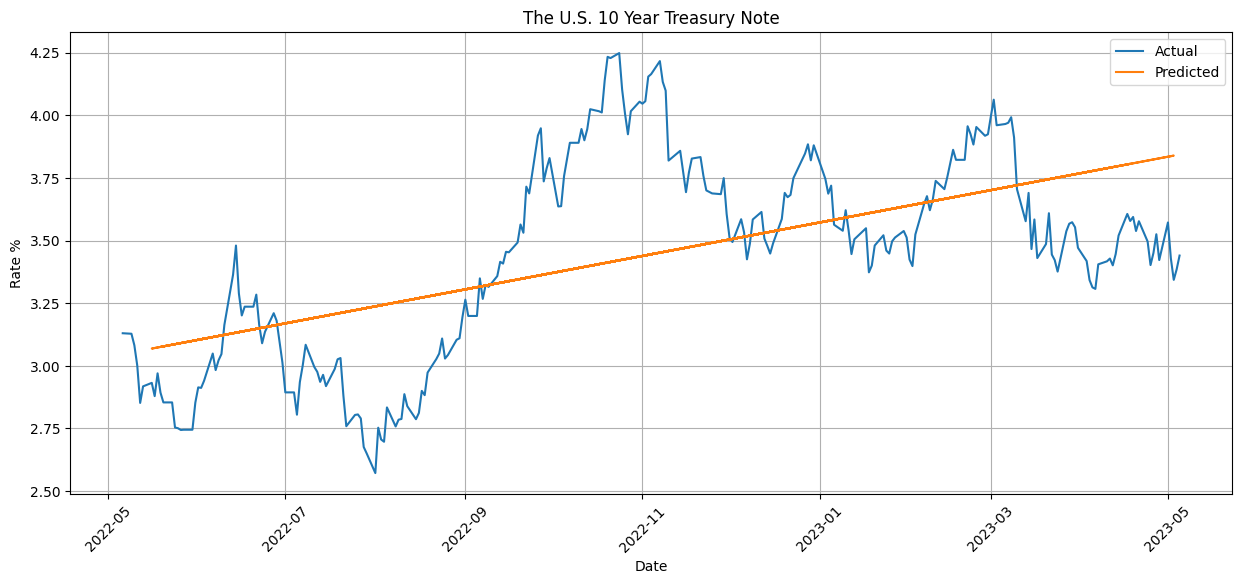

In [72]:
plt.figure(figsize=(15, 6))
plt.plot(df_bond.index, y, label='Actual')
plt.plot(new_dates, y_pred , label='Predicted')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('The U.S. 10 Year Treasury Note')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The U.S. 10 Year Treasury Note is a specific Treasury security with a maturity of 10 years, and its yield represents the market interest rate for lending to the U.S. government over that time period. It is widely regarded as a benchmark for long-term interest rates and is commonly used as a proxy for the risk-free rate in financial calculations.

#### U.S. Treasury Yields: Since the S&P 500 is a U.S. index, we can consider using U.S. Treasury yields as a reference for risk-free interest rates. 

## 9. OPTION GREEKS

In [73]:
df_june_call

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
100,$SPX,4273.79,Call,4400,6/14/2023,9,2.5,2.65,2.8,2.66,1030,267,3.86,12.15%,0.073582,16:14 ET


## DELTA

Delta represents the sensitivity of the option price to changes in the underlying asset price. It measures the change in the option price relative to a small change in the underlying asset price. Delta is usually expressed as a value between 0 and 1 for call options and between -1 and 0 for put options.A call option with a delta of 0.5 indicates that the option price will increase by 0.50 dollar for every 1 dollar increase in the underlying asset price.

In [74]:
def calculate_delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    elif option_type == 'put':
        delta = norm.cdf(d1) - 1
    return delta

In [75]:
S = 4273.79  # Underlying asset price
K = 4400  # Strike price
r = treasury_yield  # Risk-free interest rate (U.S. 10 Year Treasury Note Yield)
T = 10/365  # Time to maturity (in years)

In [76]:
sigma = implied_volatility 
print(sigma*100)

11.485352784930903


In [77]:
option_type = 'call' 
delta = calculate_delta(S, K, r, T, sigma, option_type)
print(f"Delta: {delta}")

Delta: 0.07145385122599485


## THETA 

Theta measures the rate at which the option price changes with respect to time. It represents the time decay of an option. Theta is typically negative, as options tend to lose value over time due to the diminishing time until expiration. It quantifies how much the option price will decrease as one day passes, all else being equal. Theta is expressed as a negative value, such as -0.05, indicating that the option price will decrease by 0.05 dollar per day.  

In [78]:
def calculate_theta(S, K, r, T, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)  
    if option_type == 'call':
        theta = -(S * norm.pdf(d1) * sigma) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        theta = -(S * norm.pdf(d1) * sigma) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm.cdf(-d2)  
    return theta / 365  # Convert to daily Theta

In [79]:
S = 4273.79
K = 4400  
r = treasury_yield  
T = 10 / 365  
sigma = implied_volatility 
option_type = 'call'  

In [80]:
theta = calculate_theta(S, K, r, T, sigma, option_type)
print(f"Theta: {theta}")

Theta: -0.5865714756598333


## GAMMA

Gamma represents the rate of change of the option's delta with respect to changes in the underlying asset price.
It measures the convexity of the option price. Gamma is the second derivative of the option price with respect to the underlying asset price. It indicates how much the delta will change for a 1 dollars change in the underlying asset price.
Gamma is highest for at-the-money options and decreases as the option moves further in or out of the money.

In [81]:
def calculate_gamma(S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    return gamma

In [82]:
S = 4273.79 
K = 4400 
r = treasury_yield  
T = 10/365  
sigma = implied_volatility 

In [83]:
gamma = calculate_gamma(S, K, r, T, sigma)
print(f"Gamma: {gamma}")

Gamma: 0.0016788864462289213


## VEGA

Vega measures the sensitivity of the option price to changes in implied volatility. It quantifies the impact of volatility fluctuations on the option price. Vega represents the change in the option price for a 1% increase in implied volatility.
Vega is typically positive for both call and put options, as an increase in volatility generally leads to higher option prices.

In [84]:
def calculate_vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    return vega

In [85]:
S = 4273.79 
K = 4400 
r = treasury_yield
T = 10/365 
sigma = implied_volatility 

In [86]:
vega = calculate_vega(S, K, r, T, sigma)
print(f"Vega: {vega}")

Vega: 96.49374348499815


## RHO

Rho measures the sensitivity of the option price to changes in the risk-free interest rate. It quantifies the impact of changes in interest rates on the option price. Rho indicates how much the option price will change for a 1% change in the risk-free interest rate. Rho is usually positive for call options and negative for put options.

In [87]:
def calculate_rho(S, K, r, T, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if option_type == 'call':
        rho = T * K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        rho = -T * K * math.exp(-r * T) * norm.cdf(-d2)
    return rho / 100 

In [88]:
S = 4273.79  
K = 4400 
r = treasury_yield 
T = 10/365  
sigma = implied_volatility
option_type = 'call'  

In [89]:
rho = calculate_rho(S, K, r, T, sigma, option_type)
print(f"Rho: {rho}")

Rho: 0.0829645343424996


## 10. REFRENCES 

https://pypi.org/project/nalyst/

https://analyticalharry.github.io/

https://ycharts.com/indicators/us_money_market_account_rate
    
https://www.marketwatch.com/investing/bond/tmubmusd10y/download-data?startDate=05/06/2020&endDate=05/06/2023&countryCode=bx
    

https://www.barchart.com/stocks/quotes/$SPX/volatility-greeks?expiration=2023-06-14-w&moneyness=allRows

https://en.wikipedia.org/wiki/CLS_Group

https://en.wikipedia.org/wiki/Depository_Trust_%26_Clearing_Corporation  
    
https://en.wikipedia.org/wiki/Federal_Reserve

https://www.economy.com/united-states/money-market-rate